<a href="https://colab.research.google.com/github/zznadazz/Brain-Tumors/blob/main/DL_BrainTumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Requirements

In [ ]:
!pip install kaggle

Upload kaggle.json

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadazzz","key":"9b2f14f79659cf97acb97984f6127d99"}'}

Configuring the path of Kaggle.json file

In [ ]:
!pip install scikit-learn


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 96% 143M/149M [00:00<00:00, 155MB/s]
100% 149M/149M [00:00<00:00, 159MB/s]


In [ ]:
!ls

brain-tumor-mri-dataset.zip  kaggle.json  sample_data


Extracting the compessed Dataset

In [ ]:

from zipfile import ZipFile
dataset = '/content/brain-tumor-mri-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

brain-tumor-mri-dataset.zip  kaggle.json  sample_data  Testing	Training


# Importing libraries

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

#View files

In [ ]:
glioma  = os.listdir('/content/Training/glioma')
print('First Glioma picutre', glioma[0])
meningioma  = os.listdir('/content/Training/meningioma')
print('First Meningioma picture', meningioma[0])
notumor  = os.listdir('/content/Training/notumor')
print('First No Tumor picture', notumor[0])
pituitary  = os.listdir('/content/Training/pituitary')
print('Fisrt Pituitary picture', pituitary[0])

First Glioma picutre Tr-gl_1017.jpg
First Meningioma picture Tr-me_0670.jpg
First No Tumor picture Tr-no_1340.jpg
Fisrt Pituitary picture Tr-pi_1363.jpg


Viewing pictures from every type of disease :

- No tumor
- Glioma
- Meningioma
- Pituitary



'Glioma disease'

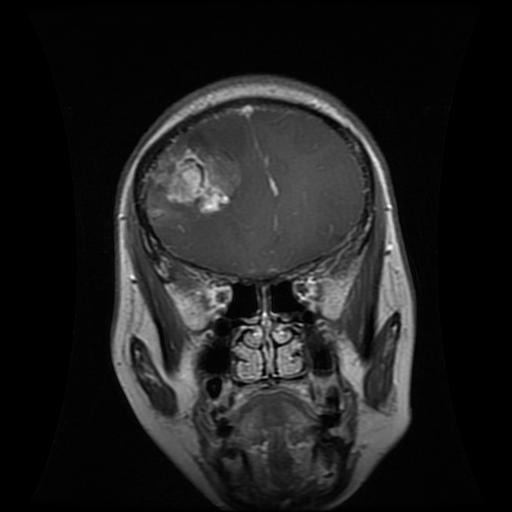

'Meningioma disease'

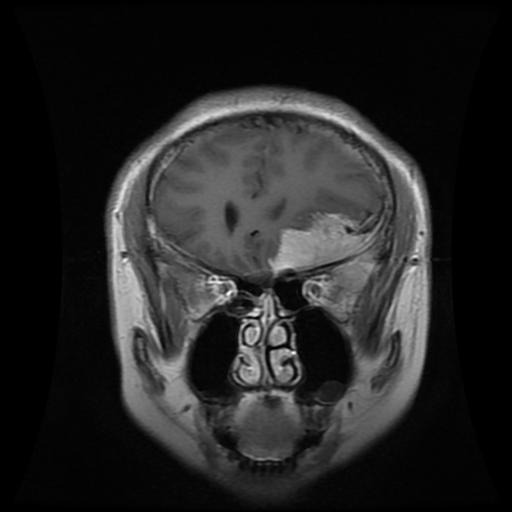

'No tumor'

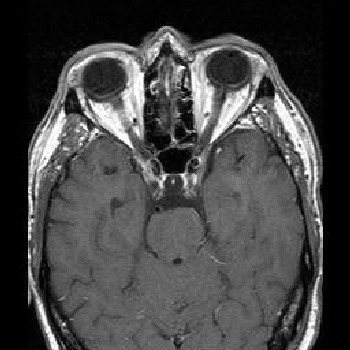

'Pituitary disease'

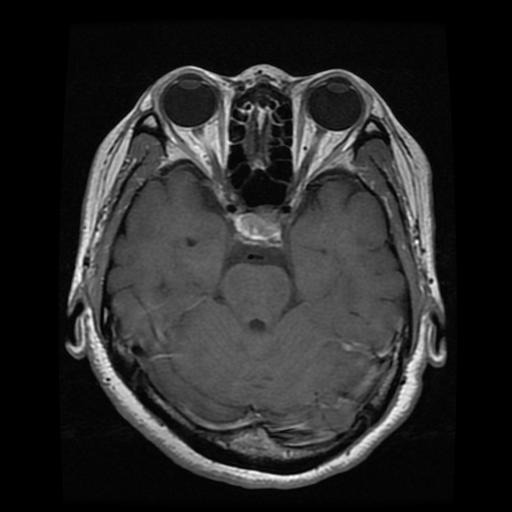

In [ ]:
#nb = Image.open('/content/Training/glioma/Tr-glTr_0000.jpg')
display('Glioma disease', Image.open('/content/Training/glioma/Tr-glTr_0000.jpg'))
display('Meningioma disease', Image.open('/content/Training/meningioma/Tr-meTr_0000.jpg'))
display('No tumor', Image.open('/content/Training/notumor/Tr-noTr_0000.jpg'))
display('Pituitary disease', Image.open('/content/Training/pituitary/Tr-piTr_0000.jpg'))

Number of files in each directory :

In [ ]:
print('Number of files Glioma', len(glioma))
print('Number of files Meningioma', len(meningioma))
print('Number of files No Tumor', len(notumor))
print('Number of files Pituitary', len(pituitary))

Number of files Glioma 1321
Number of files Meningioma 1339
Number of files No Tumor 1595
Number of files Pituitary 1457


**The number of files in each directory is almost the same, so there is no need to fix data balancement in our case**

# Processing Data

Converting images to numpy arrays

In [ ]:
def processing(data, path, files):
  for img_file in files:
    image = Image.open(path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
  return data

In [ ]:
data = []
processing(data,'/content/Training/glioma/', glioma)
len(data)
processing(data, '/content/Training/meningioma/', meningioma)
len(data)
processing(data, '/content/Training/pituitary/', pituitary)
len(data)
processing(data, '/content/Training/notumor/', notumor)
len(data)


5712

In [ ]:
print('type data: ', type(data), ' len data: ', len(data), ' shape: ', data[0].shape)

type data:  <class 'list'>  len data:  5712  shape:  (128, 128, 3)


In [ ]:
glioma_ = [0]*1321
meningioma_ = [1]*1339
pituitary_ = [2]*1595
notumor_ = [3]*1457
labels = glioma_ + meningioma_ + pituitary_ + notumor_
X = np.array(data)
y = np.array(labels)

In [ ]:
print('type X:', type(X), 'shape X:', X.shape)
print('type Y:', type(y), 'shape Y:', y.shape)

type X: <class 'numpy.ndarray'> shape X: (5712, 128, 128, 3)
type Y: <class 'numpy.ndarray'> shape Y: (5712,)


# Scaling

In [ ]:
X_scaled = X/255

In [ ]:
print('X_scaled:', X_scaled[0][0], 'X', X[0][0])

X_scaled: [[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157]
 [0.00784314 0.00784314 0.00784314]
 [0.00784314 0.00784314 0.00784314]
 [0.00784314 0.00784314 0.00784314]
 [0.00784314 0.007

# Building a CNN Model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 4

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

#Compile the neural network

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_scaled, y, validation_split=0.1, epochs=5)

Epoch 1/5
161/161 [==============================] - 171s 1s/step - loss: 1.0631 - acc: 0.5471 - val_loss: 0.7334 - val_acc: 0.7867
Epoch 2/5
161/161 [==============================] - 172s 1s/step - loss: 0.7093 - acc: 0.7377 - val_loss: 0.4315 - val_acc: 0.9528
Epoch 3/5
161/161 [==============================] - 181s 1s/step - loss: 0.5349 - acc: 0.8125 - val_loss: 0.4134 - val_acc: 0.9231
Epoch 4/5
161/161 [==============================] - 175s 1s/step - loss: 0.4421 - acc: 0.8469 - val_loss: 0.3886 - val_acc: 0.9388
Epoch 5/5
161/161 [==============================] - 176s 1s/step - loss: 0.3641 - acc: 0.8722 - val_loss: 0.2935 - val_acc: 0.9668


In [ ]:
######processed testing data###########
##################################
test_data = []
test_data = processing(test_data, '/content/Testing/glioma/', os.listdir('/content/Testing/glioma'))
test_data = processing(test_data, '/content/Testing/meningioma/', os.listdir('/content/Testing/meningioma'))
test_data = processing(test_data, '/content/Testing/pituitary/', os.listdir('/content/Testing/pituitary'))
test_data = processing(test_data, '/content/Testing/notumor/', os.listdir('/content/Testing/notumor'))

X_test = np.array(test_data)
y_test = np.array([0] * len(os.listdir('/content/Testing/glioma')) +
                  [1] * len(os.listdir('/content/Testing/meningioma')) +
                  [2] * len(os.listdir('/content/Testing/pituitary')) +
                  [3] * len(os.listdir('/content/Testing/notumor')))

X_test_scaled = X_test / 255

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
#################################

41/41 [==============================] - 20s 504ms/step - loss: 0.3481 - acc: 0.8825
Test Loss: 0.3481256365776062
Test Accuracy: 0.8825324177742004


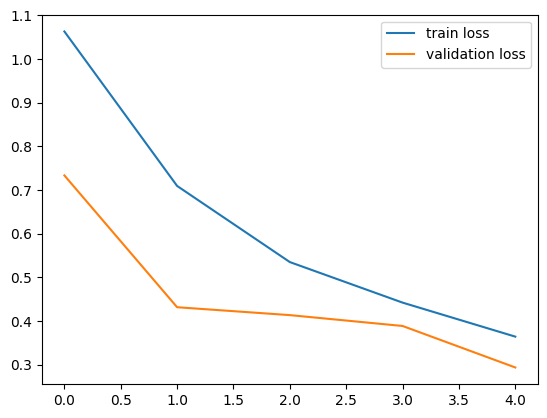

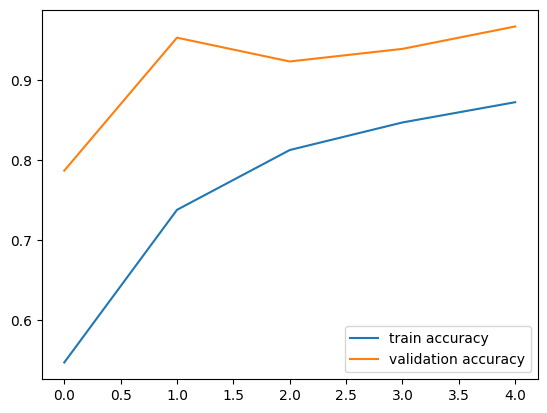

In [ ]:
h = history
# Loss
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()
plt.show()



In [ ]:
y_pred = model.predict(X_test_scaled)

41/41 [==============================] - 19s 472ms/step


In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       300
           1       0.84      0.64      0.73       306
           2       0.92      0.98      0.95       300
           3       0.90      0.99      0.94       405

    accuracy                           0.88      1311
   macro avg       0.88      0.87      0.87      1311
weighted avg       0.88      0.88      0.88      1311



#The accuracy level is 89%